<a href="https://colab.research.google.com/github/Ozk18532/INTELIGENCIA-COMPUTACIONAL-Oscar-Mercado/blob/main/EDA_y_preprocesamiento_Oscar_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

En esta actividad se desarrolla un análisis exploratorio de datos (EDA) utilizando un conjunto de datos relacionado con el área de la salud. El objetivo principal es comprender la información disponible, identificar patrones relevantes y detectar posibles valores faltantes o comportamientos atípicos. A partir de los resultados obtenidos en esta etapa, se construirá un pipeline que incluya el preprocesamiento de los datos y un modelo predictivo de aprendizaje automático.
El ejercicio permite aplicar conceptos fundamentales como exploración de variables, transformación de características y uso de pipelines con la librería sklearn, facilitando un flujo de trabajo estructurado y reproducible dentro de un notebook de Jupyter.

# **Conjunto de datos**

Para el desarrollo de esta práctica se seleccionó el conjunto de datos Breast Cancer Wisconsin (Diagnostic), disponible en Kaggle en el siguiente enlace:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Este dataset contiene mediciones obtenidas a partir de imágenes digitalizadas de biopsias de mama.

Cada registro representa un tumor y se describe mediante distintas características numéricas relacionadas con la forma, textura y tamaño del núcleo celular.

El conjunto de datos es de tamaño reducido, lo que facilita su análisis y permite un procesamiento eficiente sin requerir grandes recursos computacionales.

# **Descripción del problema**

El problema a resolver corresponde a una clasificación binaria, donde se busca predecir si un tumor es maligno o benigno con base en las características numéricas proporcionadas.
La variable objetivo es diagnosis, la cual toma valores categóricos:

*   M: tumor maligno
*   B: tumor benigno

Para el modelo de aprendizaje automático, esta variable será transformada a un formato numérico, asignando:

*   1 a los casos malignos
*   0 a los casos benignos


A partir de esta información, se entrenará un modelo de clasificación, como regresión logística o Random Forest, integrado dentro de un pipeline que permita aplicar el preprocesamiento y la predicción de forma conjunta.

# **Análisis Exploratorio de Datos (EDA)**


El conjunto de datos Breast Cancer Wisconsin (Diagnostic) está conformado por 569 registros y 32 columnas. Cada fila representa un caso clínico, mientras que las variables describen mediciones del núcleo celular obtenidas a partir de biopsias.

La estructura del dataset incluye:

* id como identificador único
* diagnosis como variable objetivo
* 30 características numéricas

La columna diagnosis corresponde a un problema de clasificación binaria, donde:

* M indica tumor maligno (1)
* B representa tumor benigno (0)

La columna id se excluye del análisis al no aportar información predictiva. El resto de las variables se conservan debido a su relevancia clínica.

El análisis de tipos de datos muestra que todas las características, excepto la variable objetivo, son numéricas. No se detectan valores faltantes en ninguna columna, por lo que no es necesario aplicar imputación.

La distribución de la variable objetivo presenta mayor número de casos benignos, aunque ambas clases cuentan con suficientes observaciones. Las variables numéricas muestran distintas escalas y cierta asimetría, lo que justifica la aplicación de técnicas de estandarización durante el preprocesamiento.

En general, el conjunto de datos se encuentra limpio, bien estructurado y es adecuado para construir un pipeline de preprocesamiento junto con un modelo de clasificación binaria.

In [ ]:
import pandas as pd
import urllib.request

# Códigos de color
V = '\033[92m'  # Verde -> positivo
R = '\033[91m'  # Rojo  -> negativo
A = '\033[94m'  # Azul  -> notas
E = '\033[0m'   # Fin de color

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
file_path = "wdbc.data"

try:
    urllib.request.urlretrieve(url, file_path)
    print(f"{V}Archivo descargado automáticamente{E}")
except Exception as e:
    print(f"{R}Error al descargar el archivo{E}")
    print(e)

print(f"{A}Nota:{E}")
print(f"{A}El conjunto de datos se obtiene directamente desde el repositorio oficial de UCI Machine Learning, lo que permite ejecutar el notebook sin necesidad de cargar archivos manualmente.{E}")


Archivo descargado automáticamente
Nota:
El conjunto de datos se obtiene directamente desde el repositorio oficial de UCI Machine Learning, lo que permite ejecutar el notebook sin necesidad de cargar archivos manualmente.


In [ ]:
# Nombres oficiales de las columnas
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

try:
    data = pd.read_csv(
        "wdbc.data",
        header=None,
        names=columns
    )
    print(f"{V}Dataset cargado correctamente{E}")
    print(f"{V}Dimensión del conjunto de datos: {data.shape}{E}")
except Exception as e:
    print(f"{R}Error al cargar el dataset{E}")
    print(e)

print(f"{A}Nota:{E}")
print(f"{A}El archivo se carga con nombres de columnas definidos manualmente, ya que el dataset original no incluye encabezados.{E}")

display(data.head())


Dataset cargado correctamente
Dimensión del conjunto de datos: (569, 32)
Nota:
El archivo se carga con nombres de columnas definidos manualmente, ya que el dataset original no incluye encabezados.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Los histogramas permiten observar la distribución de algunas variables numéricas representativas del conjunto de datos. Se aprecia que varias características presentan asimetría y diferentes escalas, lo cual justifica la aplicación de técnicas de estandarización durante el preprocesamiento.

Nota:
Se muestran histogramas de algunas variables numéricas para analizar su distribución.


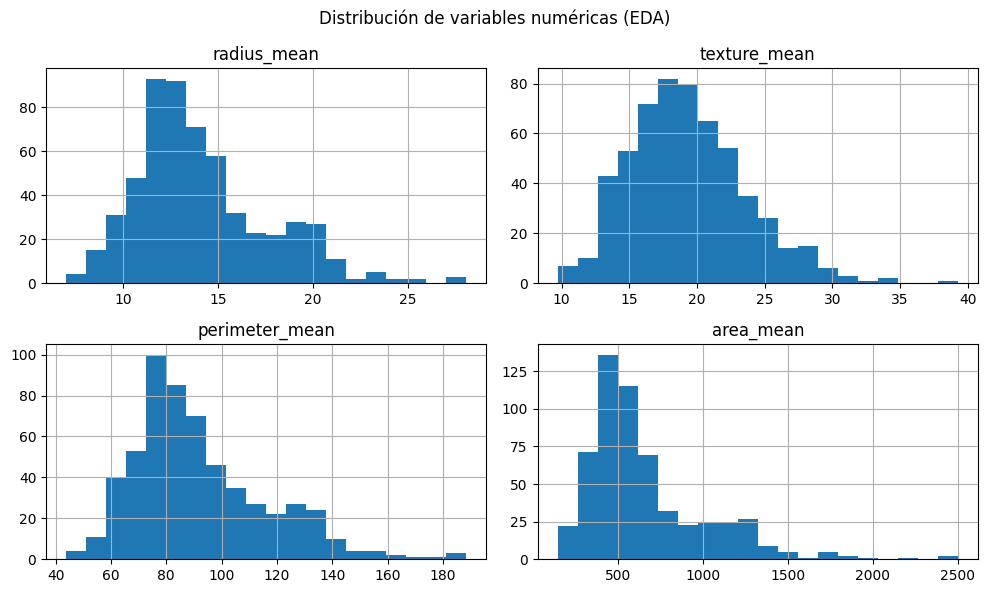

Gráfica de EDA generada correctamente


In [ ]:
print(f"{A}Nota:{E}")
print(f"{A}Se muestran histogramas de algunas variables numéricas para analizar su distribución.{E}")

# Seleccionamos algunas variables representativas
eda_cols = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean"
]

data[eda_cols].hist(figsize=(10,6), bins=20)
plt.suptitle("Distribución de variables numéricas (EDA)")
plt.tight_layout()
plt.show()

print(f"{V}Gráfica de EDA generada correctamente{E}")

In [ ]:
# Variable objetivo (M/B -> 1/0)
y = data["diagnosis"].map({"M": 1, "B": 0})

# Variables de entrada
X = data.drop(columns=["id", "diagnosis"])

# Validación básica
if y.isnull().any():
    print(f"{R}Error: existen valores distintos a M/B en la columna diagnosis{E}")
else:
    print(f"{V}Variable objetivo creada correctamente (clasificación binaria){E}")

print(f"{A}Nota:{E}")
print(f"{A}1 = Tumor maligno | 0 = Tumor benigno{E}")

print(f"{V}Distribución de clases:{E}")
print(y.value_counts())

Variable objetivo creada correctamente (clasificación binaria)
Nota:
1 = Tumor maligno | 0 = Tumor benigno
Distribución de clases:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Columnas numéricas
numeric_cols = X.columns.tolist()

print(f"{A}Nota:{E}")
print(f"{A}Todas las variables de entrada son numéricas, por lo que se aplicará imputación y estandarización.{E}")

# Pipeline de preprocesamiento
try:
    preprocessing_pipeline = make_pipeline(
        ColumnTransformer(
            transformers=[
                ("num", make_pipeline(
                    SimpleImputer(strategy="mean"),
                    StandardScaler()
                ), numeric_cols)
            ]
        )
    )
    print(f"{V}Pipeline de preprocesamiento creado correctamente{E}")
except Exception as e:
    print(f"{R}Error al crear el pipeline de preprocesamiento{E}")
    print(e)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"{V}Conjuntos de entrenamiento y prueba creados{E}")
print(f"{V}Train: {X_train.shape} | Test: {X_test.shape}{E}")

# Pipeline completo con modelo
try:
    model = make_pipeline(
        preprocessing_pipeline,
        LogisticRegression(max_iter=2000)
    )
    model.fit(X_train, y_train)
    print(f"{V}Modelo entrenado correctamente{E}")
except Exception as e:
    print(f"{R}Error durante el entrenamiento del modelo{E}")
    print(e)

# Generar predicciones del modelo
y_pred = model.predict(X_test)

print(f"{V}Predicciones generadas correctamente{E}")


Nota:
Todas las variables de entrada son numéricas, por lo que se aplicará imputación y estandarización.
Pipeline de preprocesamiento creado correctamente
Conjuntos de entrenamiento y prueba creados
Train: (455, 30) | Test: (114, 30)
Modelo entrenado correctamente
Predicciones generadas correctamente


Nota:
Se comparan los valores reales contra las predicciones del modelo usando un subconjunto del conjunto de prueba.


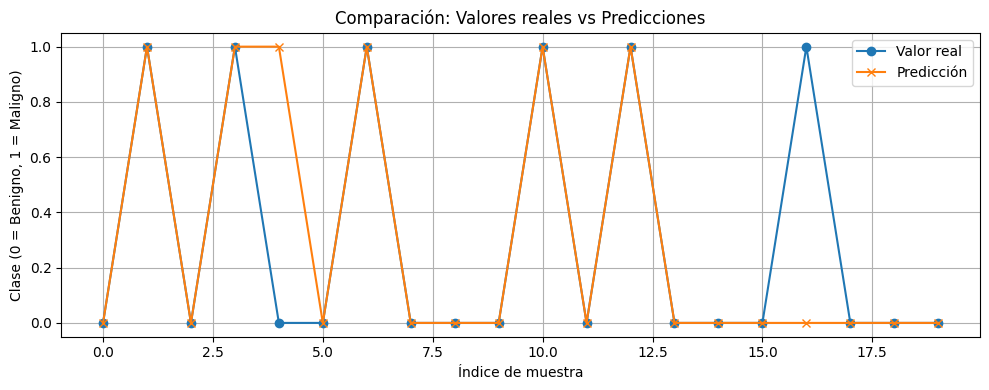

Gráfica generada correctamente


In [ ]:
import matplotlib.pyplot as plt

print(f"{A}Nota:{E}")
print(f"{A}Se comparan los valores reales contra las predicciones del modelo usando un subconjunto del conjunto de prueba.{E}")

# Tomamos solo los primeros 20 para una visualización clara
n = 20
y_real = y_test.values[:n]
y_pred_plot = y_pred[:n]

plt.figure(figsize=(10,4))
plt.plot(y_real, label="Valor real", marker="o")
plt.plot(y_pred_plot, label="Predicción", marker="x")

plt.title("Comparación: Valores reales vs Predicciones")
plt.xlabel("Índice de muestra")
plt.ylabel("Clase (0 = Benigno, 1 = Maligno)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"{V}Gráfica generada correctamente{E}")
